In [1]:
# grab libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # save model

In [2]:
# plot style
sns.set_palette("deep")
plt.style.use("ggplot")

In [3]:
# load data
df = pd.read_csv("Points.csv")

In [4]:
# quick look
print(df.shape)
print(df.columns)
print(df.head())

(646, 12)
Index(['season_end_year', 'team', 'position', 'played', 'won', 'drawn', 'lost',
       'gf', 'ga', 'gd', 'points', 'notes'],
      dtype='object')
   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24     12     6  67   
1             1993     Aston Villa         2      42   21     11    10  57   
2             1993    Norwich City         3      42   21      9    12  61   
3             1993       Blackburn         4      42   20     11    11  68   
4             1993             QPR         5      42   17     12    13  63   

   ga  gd  points                                 notes  
0  31  36      84  → Champions League via league finish  
1  40  17      74          → UEFA Cup via league finish  
2  65  -4      72        → UEFA Cup via league finish 1  
3  46  22      71                                   NaN  
4  55   8      63                                   NaN  


In [5]:
# keep what we need
df = df[['team', 'gf', 'ga', 'gd', 'points']]

In [6]:
# drop missing stuff
if df.isnull().sum().sum():
    df = df.dropna()
    print("Dropped some missing rows.")
else:
    print("No missing values.")

No missing values.


In [7]:
# drop repeats
if df.duplicated().sum():
    df = df.drop_duplicates()
    print("Dropped some duplicates.")
else:
    print("No duplicates.")

No duplicates.


In [8]:
# one-hot for team
df = pd.get_dummies(df, columns=['team'], drop_first=True)
print("Shape after encoding:", df.shape)

Shape after encoding: (646, 54)


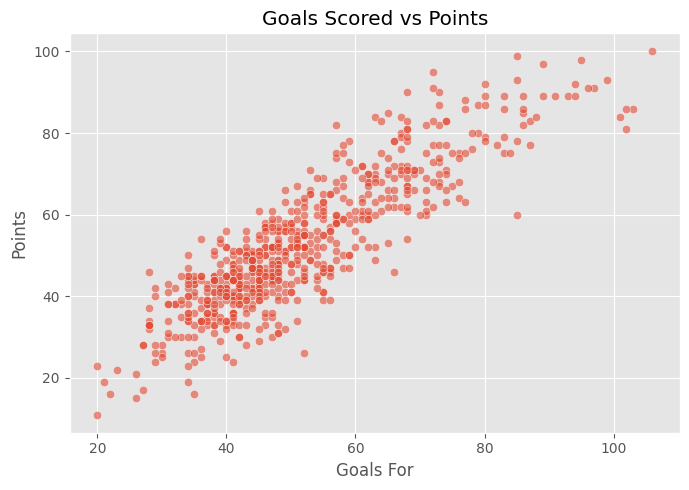

In [9]:
# plot: goals for vs points
plt.figure(figsize=(7, 5))
sns.scatterplot(x='gf', y='points', data=df, alpha=0.6)
plt.title("Goals Scored vs Points")
plt.xlabel("Goals For")
plt.ylabel("Points")
plt.tight_layout()
plt.show()

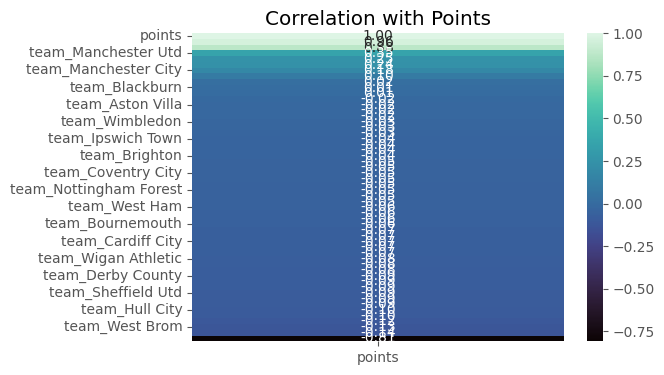

In [10]:
# check correlation
corr = df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr[['points']].sort_values('points', ascending=False), annot=True, cmap="mako", fmt=".2f")
plt.title("Correlation with Points")
plt.show()

In [11]:
# split X and y
X = df.drop(['points'], axis=1)
y = df['points']

In [12]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=10)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (529, 53) Test: (117, 53)


In [14]:
# fit linear reg
lr = LinearRegression()
lr.fit(X_train, y_train)
# fit random forest
rf = RandomForestRegressor(n_estimators=120, random_state=42, max_depth=10)
rf.fit(X_train, y_train)
# predict
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [15]:
# eval func
def evaluate(y_true, y_pred, name="Model"):
    print(f"{name}: MAE={mean_absolute_error(y_true, y_pred):.2f}, RMSE={np.sqrt(mean_squared_error(y_true, y_pred)):.2f}, R2={r2_score(y_true, y_pred):.3f}")

In [16]:
# see results
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest")

Linear Regression: MAE=3.81, RMSE=4.80, R2=0.908
Random Forest: MAE=3.85, RMSE=4.83, R2=0.907


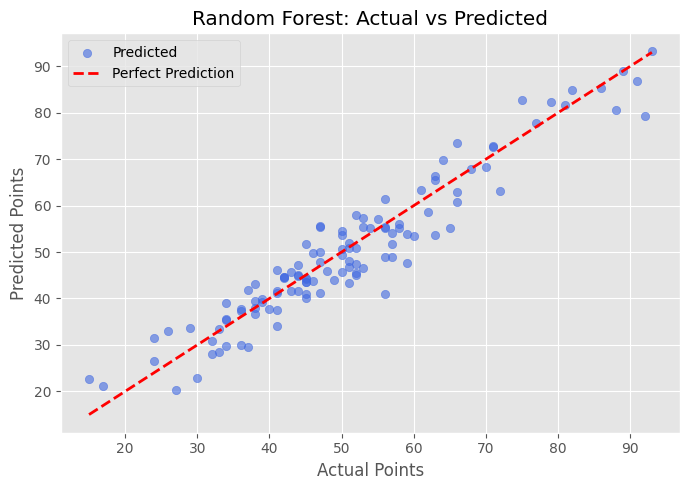

In [17]:
# plot actual vs pred RF
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_rf, c='royalblue', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Random Forest: Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# sample actual vs predicted
print("\nSample Actual vs Predicted Points (Random Forest):")
sample = pd.DataFrame({
    "Actual": y_test.iloc[:12].values,
    "Predicted_RF": y_pred_rf[:12].round(2)
})
print(sample)


Sample Actual vs Predicted Points (Random Forest):
    Actual  Predicted_RF
0       75         82.75
1       32         28.05
2       47         55.51
3       65         55.19
4       17         21.06
5       47         41.09
6       44         47.25
7       26         32.94
8       41         34.03
9       54         55.16
10      34         29.67
11      40         37.63


In [20]:
# save model
joblib.dump(rf, "epl_points_rf_model.joblib")
print("Model saved as 'epl_points_rf_model.joblib'.")

Model saved as 'epl_points_rf_model.joblib'.


In [21]:
# colab download
from google.colab import files
files.download('epl_points_rf_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>